# Лабораторная работа №2

# Обработка пропусков в данных, кодирование категориальных признаков, масштабирование данных.

Цель лабораторной работы: изучение способов предварительной обработки данных для дальнейшего формирования моделей.

### Задание:
1. Выбрать набор данных (датасет), содержащий категориальные признаки и пропуски в данных. Для выполнения следующих пунктов можно использовать несколько различных наборов данных (один для обработки пропусков, другой для категориальных признаков и т.д.)
2. Для выбранного датасета (датасетов) на основе материалов лекции решить следующие задачи:
 - обработку пропусков в данных;
 - кодирование категориальных признаков;
 - масштабирование данных.

### Импорт библиотек

In [9]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
sns.set(style="ticks")

### Загрузка и первичный анализ данных

Используем данные с kaggle [Фильмы и телешоу Netflix](https://www.kaggle.com/shivamb/netflix-shows)

In [10]:
data = pd.read_csv('data/netflix_titles.csv', sep=",")

In [11]:
# размер набора данных
data.shape

(7787, 12)

In [12]:
# типы колонок
data.dtypes

show_id         object
type            object
title           object
director        object
cast            object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
description     object
dtype: object

In [13]:
# проверим есть ли пропущенные значения
data.isnull().sum()

show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64

In [14]:
# Первые 5 строк датасета
data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [15]:
total_count = data.shape[0]
print('Всего строк: {}'.format(total_count))

Всего строк: 7787


## Обработка пропусков в данных

In [16]:
# Выберем колонки с пропущенными значениями
# Цикл по колонкам датасета
num_cols = []
for col in data.columns:
    # Количество пустых значений 
    temp_null_count = data[data[col].isnull()].shape[0]
    dt = str(data[col].dtype)
    if temp_null_count>0:
        num_cols.append(col)
        temp_perc = round((temp_null_count / total_count) * 100.0, 2)
        print('Колонка {}. Тип данных {}. Количество пустых значений {}, {}%.'.format(col, dt, temp_null_count, temp_perc))

Колонка director. Тип данных object. Количество пустых значений 2389, 30.68%.
Колонка cast. Тип данных object. Количество пустых значений 718, 9.22%.
Колонка country. Тип данных object. Количество пустых значений 507, 6.51%.
Колонка date_added. Тип данных object. Количество пустых значений 10, 0.13%.
Колонка rating. Тип данных object. Количество пустых значений 7, 0.09%.


In [17]:
# Фильтр по колонкам с пропущенными значениями
data_num = data[num_cols]
data_num

,director,cast,country,date_added,rating
0,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",TV-MA
1,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",TV-MA
2,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",R
3,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",PG-13
4,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",PG-13
...,...,...,...,...,...
7782,Josef Fares,"Imad Creidi, Antoinette Turk, Elias Gergi, Car...","Sweden, Czech Republic, United Kingdom, Denmar...","October 19, 2020",TV-MA
7783,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",TV-14
7784,NaN,Nasty C,NaN,"September 25, 2020",TV-MA
7785,NaN,"Adriano Zumbo, Rachel Khoo",Australia,"October 31, 2020",TV-PG


In [18]:
cat_temp_data = data[['rating']]
cat_temp_data.head()

,rating
0,TV-MA
1,TV-MA
2,R
3,PG-13
4,PG-13


In [19]:
cat_temp_data['rating'].unique()

array(['TV-MA', 'R', 'PG-13', 'TV-14', 'TV-PG', 'NR', 'TV-G', 'TV-Y', nan,
       'TV-Y7', 'PG', 'G', 'NC-17', 'TV-Y7-FV', 'UR'], dtype=object)

In [20]:
cat_temp_data[cat_temp_data['rating'].isnull()].shape

(7, 1)

Подключим библиотеки для обработки пропусков

In [21]:
from sklearn.impute import SimpleImputer
from sklearn.impute import MissingIndicator

In [22]:
# Импьютация наиболее частыми значениями
imp2 = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
data_imp2 = imp2.fit_transform(cat_temp_data)
data_imp2

array([['TV-MA'],
       ['TV-MA'],
       ['R'],
       ...,
       ['TV-MA'],
       ['TV-PG'],
       ['TV-MA']], dtype=object)

In [23]:
# Пустые значения отсутствуют
np.unique(data_imp2)

array(['G', 'NC-17', 'NR', 'PG', 'PG-13', 'R', 'TV-14', 'TV-G', 'TV-MA',
       'TV-PG', 'TV-Y', 'TV-Y7', 'TV-Y7-FV', 'UR'], dtype=object)

In [24]:
# Импьютация константой
imp3 = SimpleImputer(missing_values=np.nan, strategy='constant', fill_value='NA')
data_imp3 = imp3.fit_transform(cat_temp_data)
data_imp3

array([['TV-MA'],
       ['TV-MA'],
       ['R'],
       ...,
       ['TV-MA'],
       ['TV-PG'],
       ['TV-MA']], dtype=object)

In [25]:
np.unique(data_imp3)

array(['G', 'NA', 'NC-17', 'NR', 'PG', 'PG-13', 'R', 'TV-14', 'TV-G',
       'TV-MA', 'TV-PG', 'TV-Y', 'TV-Y7', 'TV-Y7-FV', 'UR'], dtype=object)

In [26]:
data_imp3[data_imp3=='NA'].size

7

## Кодирование категориальных признаков 

### Кодирование категорий целочисленными значениями - [label encoding](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html)

In [27]:
cat_enc = pd.DataFrame({'c1':data_imp2.T[0]})
cat_enc

,c1
0,TV-MA
1,TV-MA
2,R
3,PG-13
4,PG-13
...,...
7782,TV-MA
7783,TV-14
7784,TV-MA
7785,TV-PG


In [28]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [29]:
le = LabelEncoder()
cat_enc_le = le.fit_transform(cat_enc['c1'])

In [30]:
np.unique(cat_enc_le)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13])

In [31]:
le.inverse_transform([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13])

array(['G', 'NC-17', 'NR', 'PG', 'PG-13', 'R', 'TV-14', 'TV-G', 'TV-MA',
       'TV-PG', 'TV-Y', 'TV-Y7', 'TV-Y7-FV', 'UR'], dtype=object)

### Кодирование категорий наборами бинарных значений - [one-hot encoding](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html)

In [32]:
ohe = OneHotEncoder()
cat_enc_ohe = ohe.fit_transform(cat_enc[['c1']])

In [33]:
cat_enc.shape

(7787, 1)

In [34]:
cat_enc_ohe.shape

(7787, 14)

In [35]:
cat_enc_ohe.todense()[0:10]

matrix([[0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]])

In [36]:
cat_enc.head(10)

,c1
0,TV-MA
1,TV-MA
2,R
3,PG-13
4,PG-13
5,TV-MA
6,TV-MA
7,R
8,TV-14
9,TV-MA


## Масштабирование данных

In [37]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler, Normalizer

### [MinMax масштабирование](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html)

In [38]:
sc1 = MinMaxScaler()
sc1_data = sc1.fit_transform(data[['release_year']])

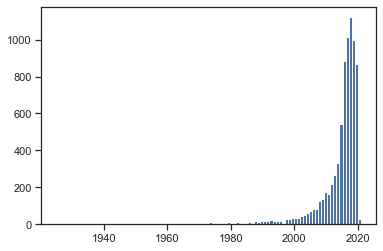

In [39]:
plt.hist(data['release_year'], 100)
plt.show()

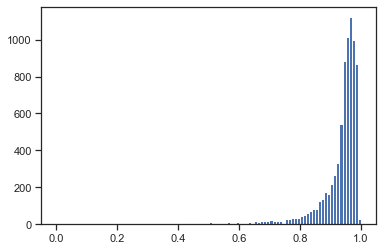

In [40]:
plt.hist(sc1_data, 100)
plt.show()

### Масштабирование данных на основе [Z-оценки](https://ru.wikipedia.org/wiki/Z-%D0%BE%D1%86%D0%B5%D0%BD%D0%BA%D0%B0) - [StandardScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html#sklearn.preprocessing.StandardScaler)

In [41]:
sc2 = StandardScaler()
sc2_data = sc2.fit_transform(data[['release_year']])

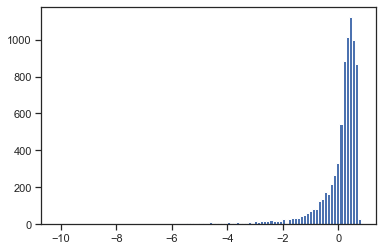

In [42]:
plt.hist(sc2_data, 100)
plt.show()